In [4]:
%pylab inline

import pandas as pd
import prince
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### This dataset contains information of a survey linked to the basic income, conducted in Europe in 2016. 
### The goal of this analyses is to show which type of person is more or less likely to vote in favour of the basic income, and to show which individual characteristics affect the most this decision.

In [13]:
data=pd.read_csv("/Users/sadhik11/Desktop/file/advstat_traing/11nov2020/basic_income_dataset_dalia.csv")

In [14]:
data.head()

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.9775919155
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136


In [15]:
data.columns

Index(['country_code', 'uuid', 'age', 'gender', 'rural', 'dem_education_level',
       'dem_full_time_job', 'dem_has_children',
       'question_bbi_2016wave4_basicincome_awareness',
       'question_bbi_2016wave4_basicincome_vote',
       'question_bbi_2016wave4_basicincome_effect',
       'question_bbi_2016wave4_basicincome_argumentsfor',
       'question_bbi_2016wave4_basicincome_argumentsagainst', 'age_group',
       'weight'],
      dtype='object')

In [16]:
data=data.rename(columns={'country_code':'country', 'dem_education_level':'education', 'dem_full_time_job':'job', 
                     'dem_has_children':'children', 'question_bbi_2016wave4_basicincome_awareness':'awareness',
                    'question_bbi_2016wave4_basicincome_vote':'vote'})

In [17]:
data["age_group"]=pd.cut(data.age,bins=[0,25,39,100],labels=['young','adult','aged'])

In [18]:
data.head()

,country,uuid,age,gender,rural,education,job,children,awareness,vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,aged,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,aged,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,adult,0.9775919155
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,aged,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,aged,58.731.136


In [19]:
data.columns

Index(['country', 'uuid', 'age', 'gender', 'rural', 'education', 'job',
       'children', 'awareness', 'vote',
       'question_bbi_2016wave4_basicincome_effect',
       'question_bbi_2016wave4_basicincome_argumentsfor',
       'question_bbi_2016wave4_basicincome_argumentsagainst', 'age_group',
       'weight'],
      dtype='object')

In [20]:
keep_col=["country","age_group","gender","rural","education","job","children","awareness","vote"]

In [21]:
data=data[keep_col]

In [22]:
data.shape

(9649, 9)

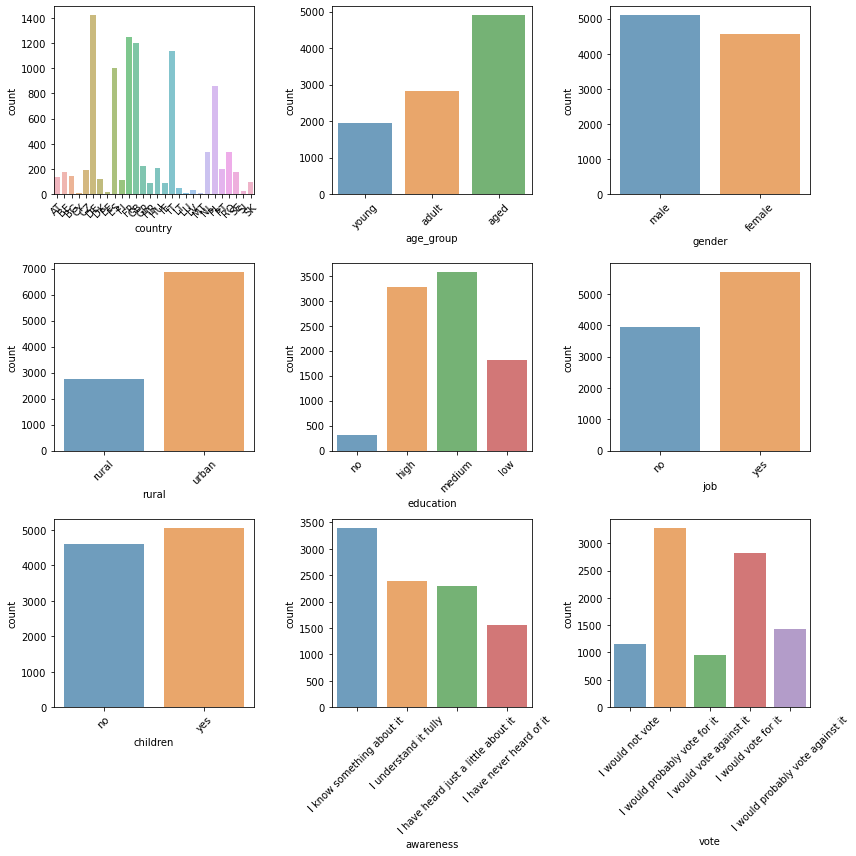

In [57]:
fig, axes = plt.subplots(round(len(data.columns) / 3), 3, figsize=(12, 12))

for i, ax in enumerate(fig.axes):
    if i < len(data.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data.columns[i], alpha=0.7, data=data, ax=ax)

fig.tight_layout()

In [61]:
Analys_col=["gender","rural","education","job","children","awareness","vote"]

In [62]:
data2=data[Analys_col]

In [87]:
mca = prince.MCA(n_components=4,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)

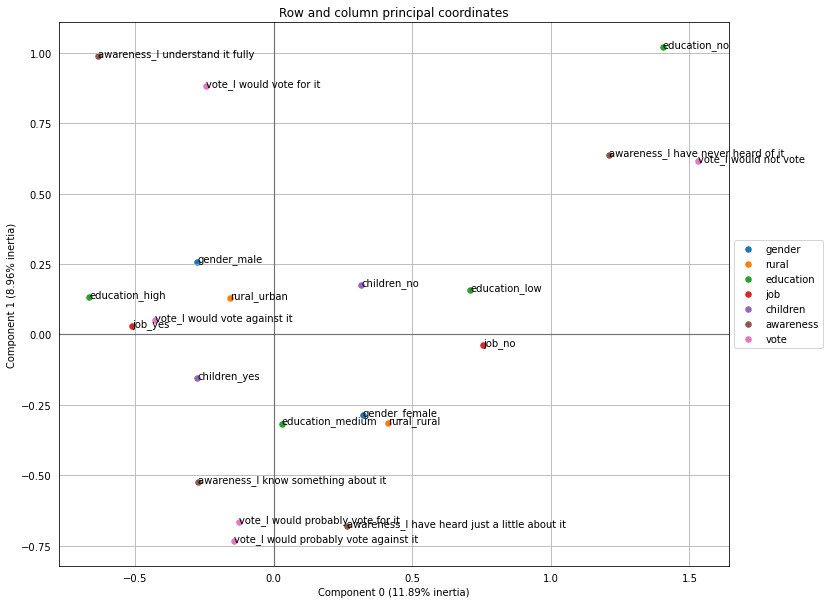

In [103]:
income_mca = mca.fit(data2)

ax = income_mca.plot_coordinates(
        X=data2,
        ax=None,
        figsize=(12, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### We see that the categories, such that low education, no job and no prior knowledge of the basic income are very close to the category: ‘I would not vote’. These categories are positives for the two dimensions. 

### The categories ‘education_high’, ‘urban’, ‘I would vote against it’ are negative on the first dimension but positive on the second. This makes us think that the more we move to the right on the first dimension, the less educated individuals we find, who know less about the basic income and the more likely is that they are not employed.

### Finally, the second dimension seem to seperate the people who are sure about voting: higher on the second dimension, we find the individuals who are sure about not voting or sure about voting, whereas below we find the individuals who are not certain to vote at all.

### ...

In [89]:
income_mca2= mca.transform(data2)

In [90]:
income_mca2

,0,1,2,3
0,1.133024,0.402662,0.314956,0.695813
1,-0.775859,0.241852,0.120749,-0.074725
2,0.830885,0.180297,0.276099,0.538007
3,-0.345560,-0.470580,0.217030,-0.174801
4,-0.337841,-0.505112,0.088743,-0.362748
...,...,...,...,...
9644,-0.427733,0.169498,-0.192291,0.000379
9645,-0.240875,0.099383,0.917929,0.019506
9646,0.919710,0.207586,0.100566,0.449471
9647,-0.408997,0.771405,-0.294656,-0.201490


In [91]:
income_mca.eigenvalues_

[0.23788396565516767,
 0.17929006796511404,
 0.17078146729858915,
 0.15411861055601006]

In [92]:
income_mca.total_inertia_

2.0

In [93]:
income_mca.explained_inertia_

[0.11894198282758384,
 0.08964503398255702,
 0.08539073364929457,
 0.07705930527800503]

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince # for multiple correspondence analysis
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [105]:
churn1=pd.read_csv("/Users/sadhik11/Desktop/file/advstat_traing/11nov2020/Customer_churn.csv")

In [106]:
senior = {0 : 'No',
        1 : 'Yes'}

churn1['SeniorCitizen'].replace(senior, inplace=True)

def tenure(data):
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

churn1['tenure'] = churn1['tenure'].apply(tenure)

def charges(data):
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

churn1['MonthlyCharges'] = churn1['MonthlyCharges'].apply(charges)
recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic check' : 'check',
            'Mailed check' : 'check',
            'Bank transfer (automatic)' : 'automatic',
            'Credit card (automatic)' : 'automatic'
            }

churn1.replace(recode, inplace=True)
# drop customer ID  using pandass
churn1.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)


In [107]:
print("The original data set contains: {} rows and {} columns".format(churn1.shape[0], churn1.shape[1]))
print("Features of the original data set:\n", list(churn1.columns))

The original data set contains: 7043 rows and 19 columns
Features of the original data set:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']


In [108]:
# number of categorical features
print("Number of categorical features : {}".format(len(churn1.select_dtypes(include=['object']).columns)))
print("Number of continuous features : {}".format(len(churn1.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 19
Number of continuous features : 0


In [109]:
churn1.nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
tenure              2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       2
MonthlyCharges      2
Churn               2
dtype: int64

In [110]:
churn1.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [111]:
churn1.InternetService.value_counts()

Fberoptic    3096
DSL          2421
No           1526
Name: InternetService, dtype: int64

In [112]:
churn1.Contract.value_counts()

MtM      3875
TwoYr    1695
OneYr    1473
Name: Contract, dtype: int64

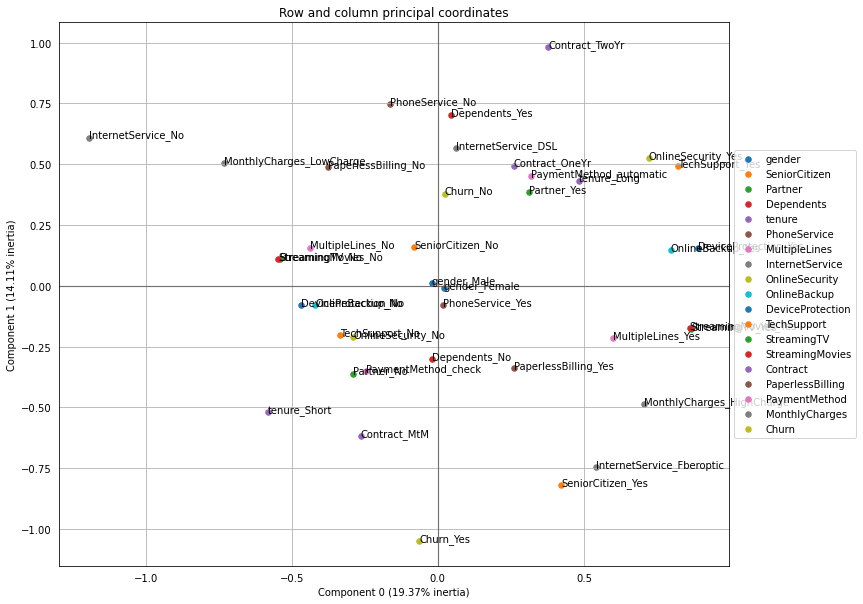

In [115]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_mca = mca.fit(churn1)

ax = churn_mca.plot_coordinates(
        X=churn1,
        ax=None,
        figsize=(12, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### A general guide to interpreting the multiple correspondence analysis plot shown above for business insights would be to make a note as to how close input categorical features are to the target variable customer churn and to each other. For instance, senior citizens, customers with fiber optic internet service, those with month to month contractual agreements, and single customers or customers with no dependents are being related to a short tenure with the company and a propensity of high risk to churn. On the other hand, customers with more than a year contract, those with DSL internet service, younger customers, customers with multiple lines are being related to a long tenure with the company and a higher tendency to stay with company

## Best Subset Selection using the chi2 test stat for categorical features

In [117]:
churn2 = pd.get_dummies(churn1, drop_first=True)

In [118]:
print(churn2.shape)
print("The data set contains: {} rows and {} columns".format(churn2.shape[0], churn2.shape[1]))
print("Features after get_dummies:\n", list(churn2.columns))

(7043, 21)
The data set contains: 7043 rows and 21 columns
Features after get_dummies:
 ['gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'tenure_Short', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fberoptic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_OneYr', 'Contract_TwoYr', 'PaperlessBilling_Yes', 'PaymentMethod_check', 'MonthlyCharges_LowCharge', 'Churn_Yes']


In [119]:
X = churn2.drop('Churn_Yes', axis=1) # input categorical features
y = churn2['Churn_Yes'] # target variable

In [120]:
# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 gender_Male: 0.258699
 SeniorCitizen_Yes: 134.351545
 Partner_Yes: 82.412083
 Dependents_Yes: 133.036443
 tenure_Short: 372.654914
 PhoneService_Yes: 0.097261
 MultipleLines_Yes: 6.548512
 InternetService_Fberoptic: 374.476216
 InternetService_No: 286.520193
 OnlineSecurity_Yes: 147.295858
 OnlineBackup_Yes: 31.217694
 DeviceProtection_Yes: 20.226662
 TechSupport_Yes: 135.559783
 StreamingTV_Yes: 17.334235
 StreamingMovies_Yes: 16.242531
 Contract_OneYr: 176.123171
 Contract_TwoYr: 488.578090
 PaperlessBilling_Yes: 105.680863
 PaymentMethod_check: 135.084515
 MonthlyCharges_LowCharge: 148.208006


### The way to interpret the above chi2 scores is that categorical features with the highest values for the chi-squared stat indicate higher relevance and importance in predicting customer churn and may be included in a predictive model development.

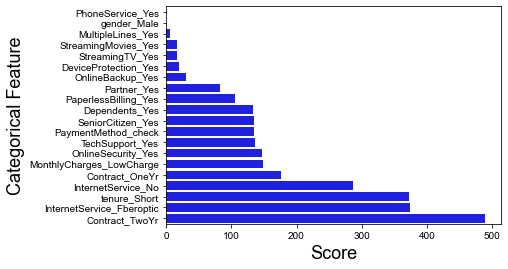

In [121]:
# plot the scores
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()